priority_group
Baixa              387819
Média              381013
Não emergencial    161932
Alta               117377
Fora de serviço       276
Emergência            153
Name: count, dtype: int64
Gráfico de contagem de chamadas por prioridade: Este gráfico mostra o número de chamadas em cada categoria de prioridade.


C:\Users\Gamer\AppData\Local\Temp\ipykernel_10132\3388654852.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='priority_group', data=csv, palette='viridis')


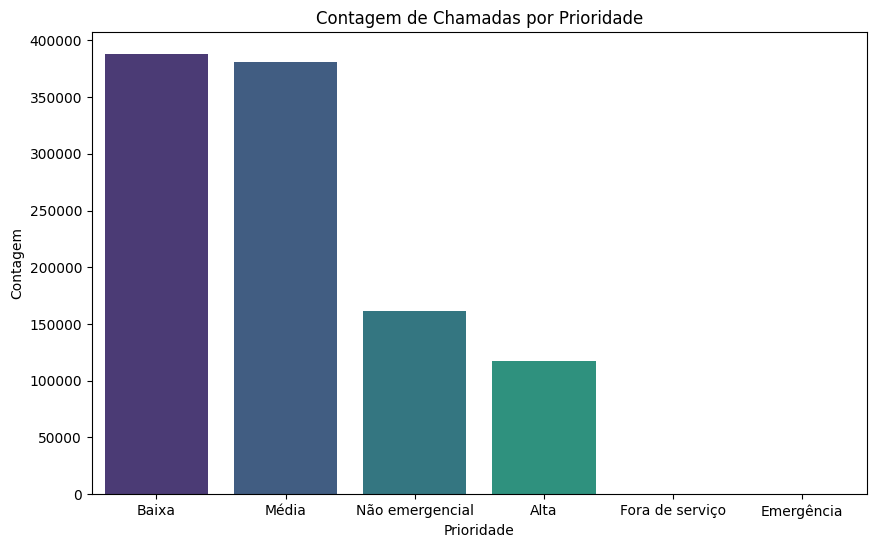

Gráfico de contagem de chamadas por dia da semana: Este gráfico mostra a quantidade de chamadas em cada dia da semana, categorizadas por prioridade.


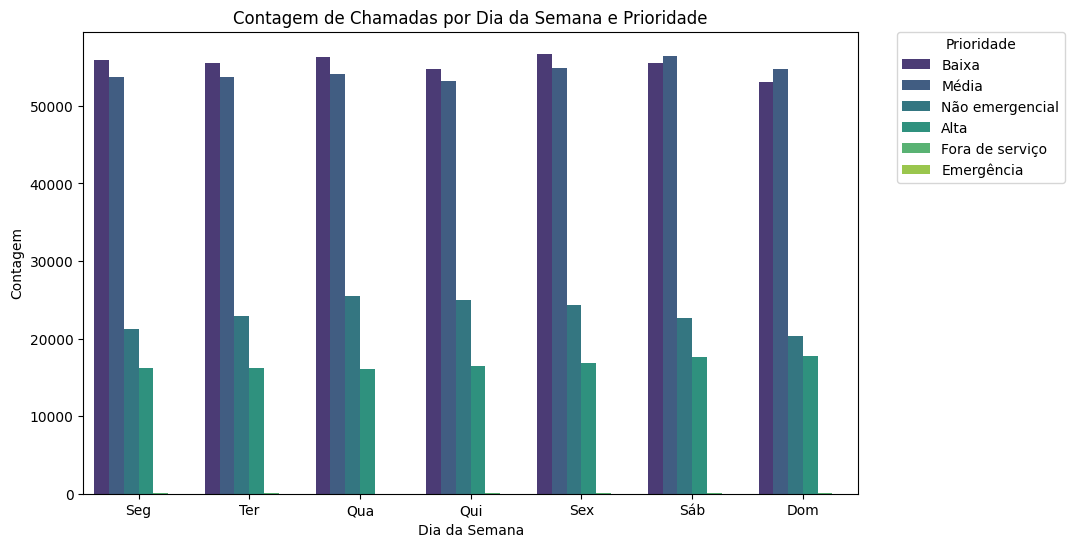

Gráfico de contagem de chamadas por mês: Este gráfico mostra o número de chamadas em cada mês, categorizadas por prioridade.


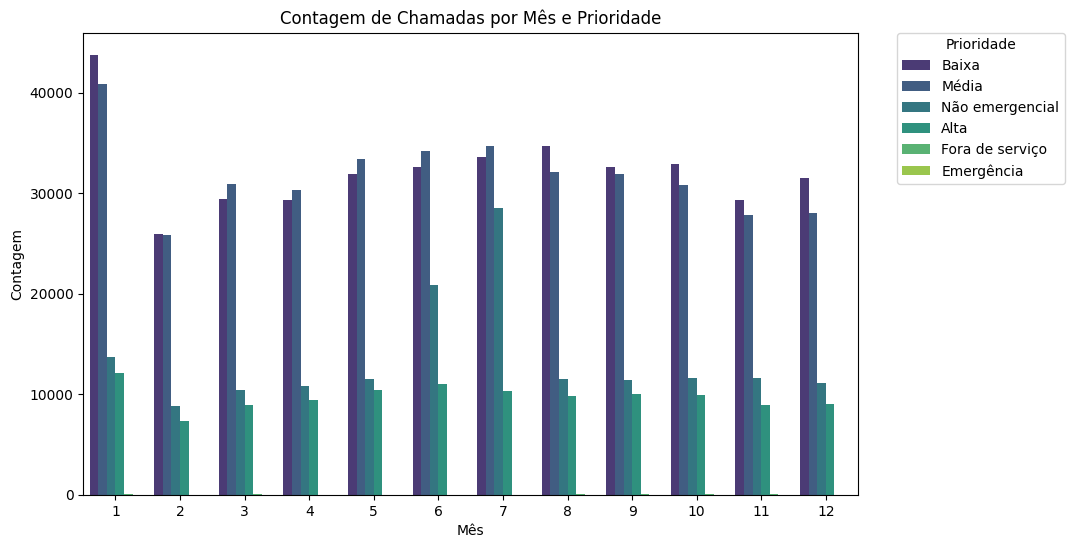

Gráfico de chamadas por mês: Este gráfico mostra o número total de chamadas por mês ao longo do tempo.


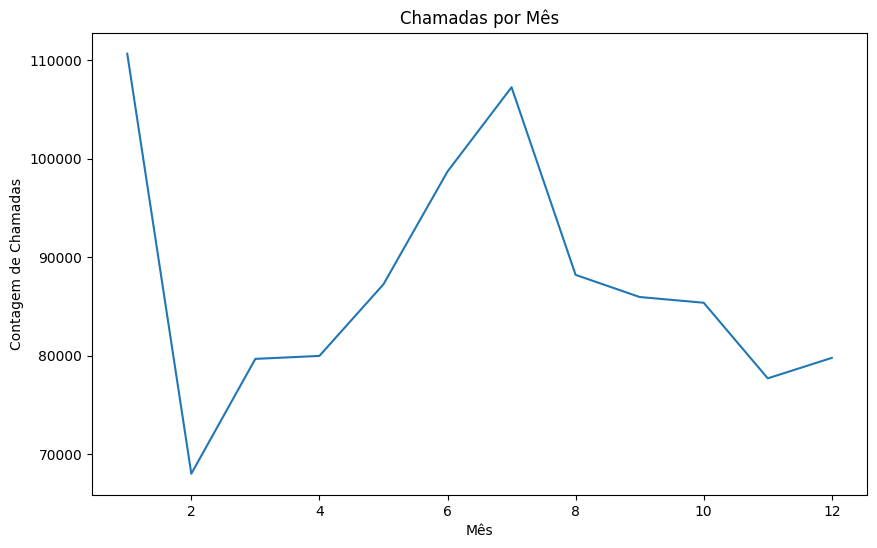

Gráfico de regressão linear de chamadas por mês: Este gráfico mostra uma linha de regressão linear que modela a relação entre o mês e o número de chamadas.


<Figure size 1000x600 with 0 Axes>

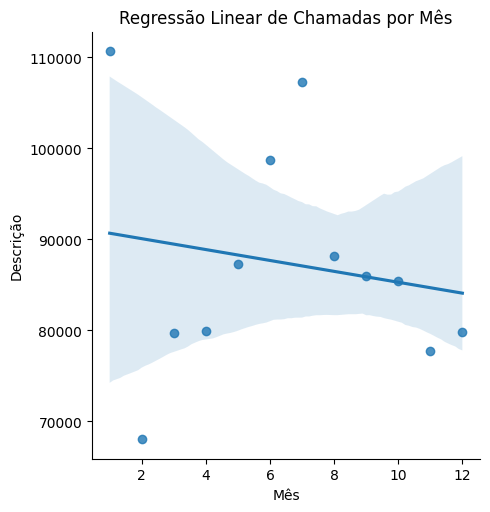

Gráfico de chamadas por data: Este gráfico mostra o número de chamadas para cada dia específico.


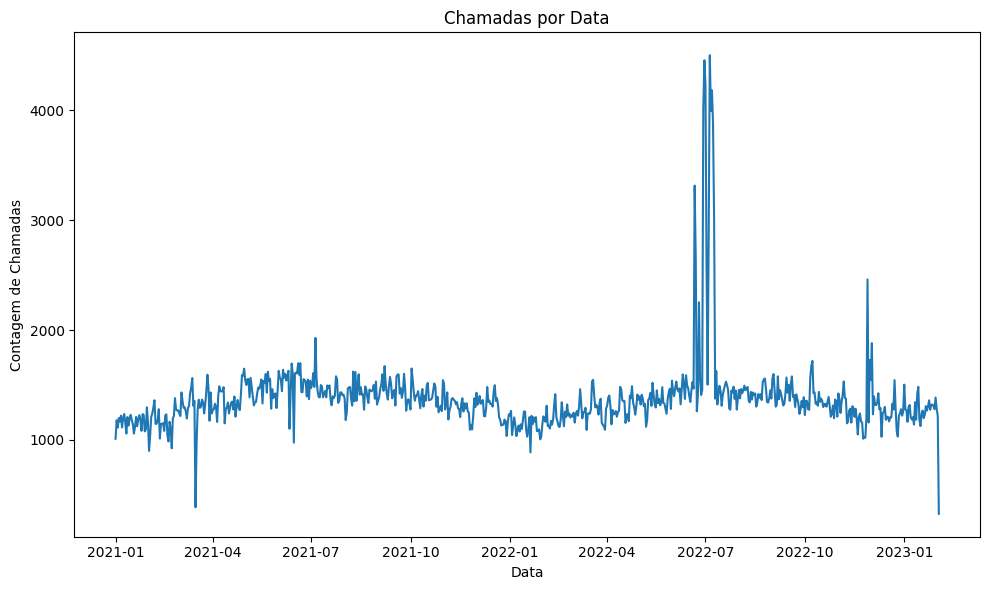

Mapa de calor de chamadas por dia da semana e hora: Este gráfico mostra a densidade de chamadas ao longo da semana e das horas do dia.


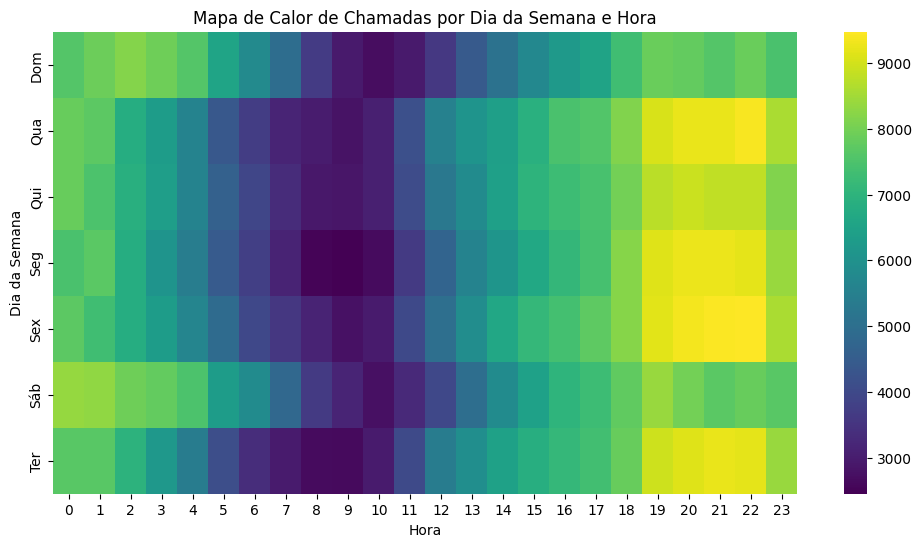

Cluster map de chamadas por dia da semana e hora: Este gráfico agrupa e mostra a densidade de chamadas ao longo da semana e das horas do dia de forma hierárquica.


<Figure size 1200x600 with 0 Axes>

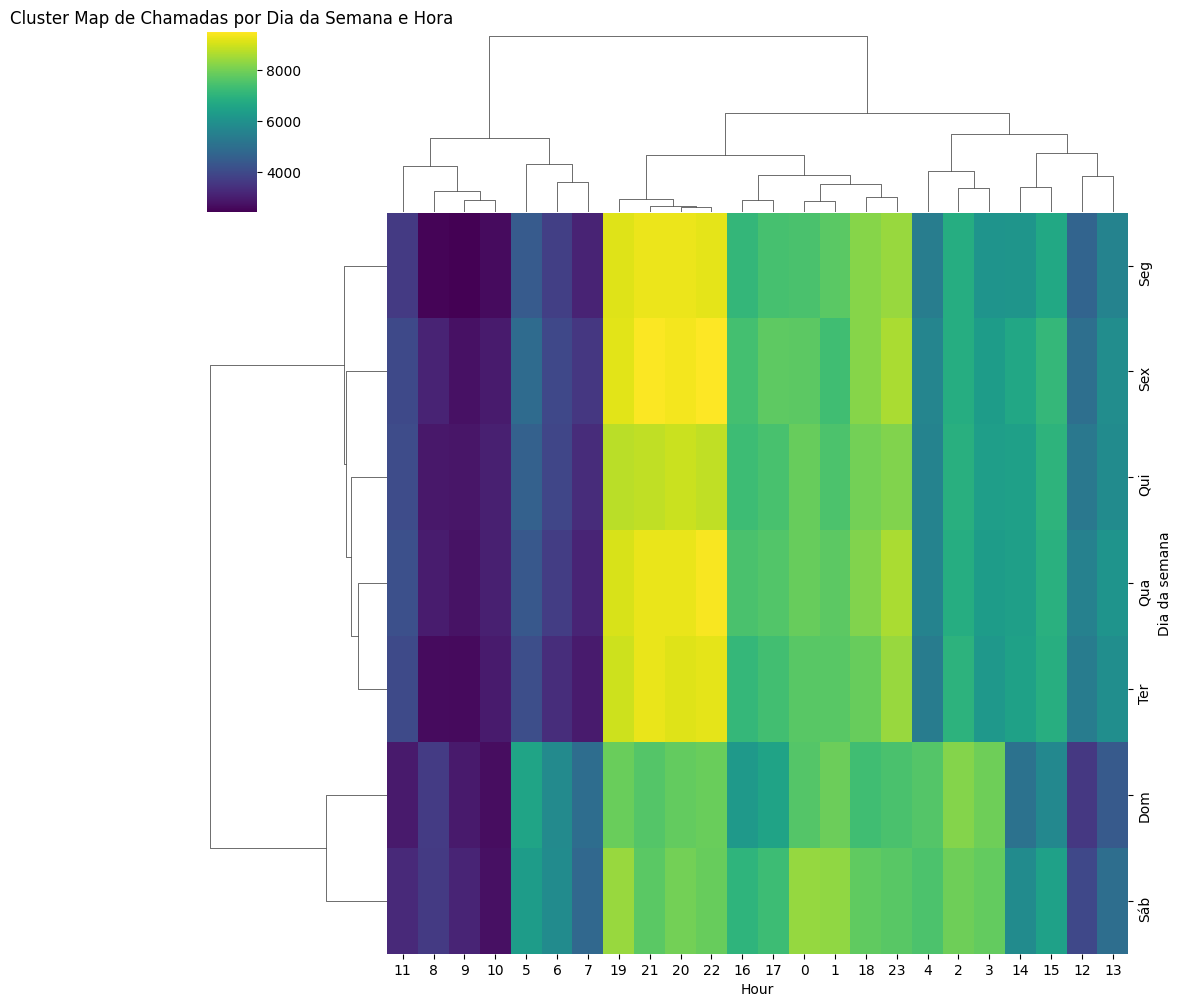

Mapa de calor de chamadas por dia da semana e mês: Este gráfico mostra a densidade de chamadas ao longo da semana e dos meses do ano.


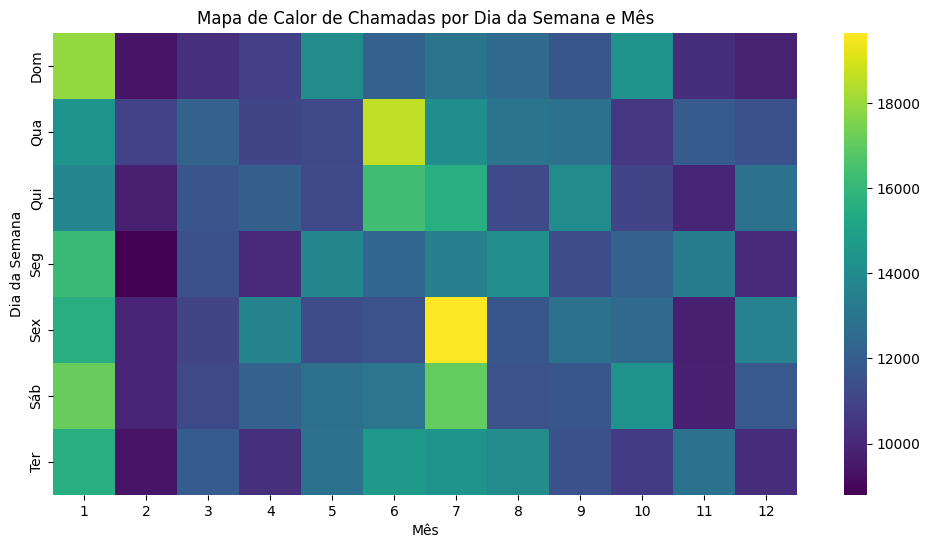

c:\Users\Gamer\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


O algoritmo K-means foi utilizado para agrupar as chamadas de emergência com base na hora e no mês.
Isso nos ajuda a identificar padrões e tendências nas chamadas de emergência ao longo do tempo.
Inércia do K-means como porcentagem do total de variância inicial: 85.78%
Gráfico de clusters de chamadas de emergência por hora e mês: Este gráfico mostra os grupos formados pelo algoritmo K-means com base na hora e no mês das chamadas.


C:\Users\Gamer\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


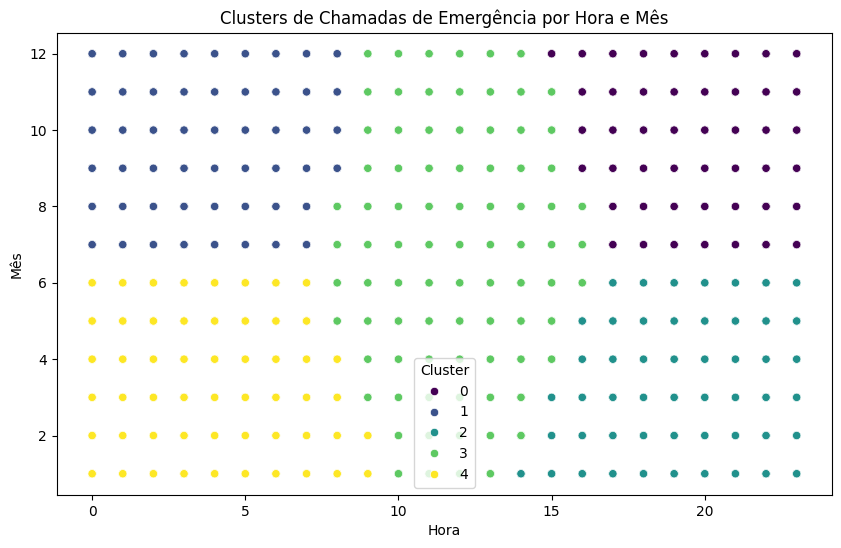

In [10]:
!pip install pandas seaborn matplotlib scikit-learn

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Caminho do arquivo CSV
url = '911_Calls_for_Service-Formated2.csv'

# Tentar ler o CSV com opções para lidar com problemas de formatação
try:
    csv = pd.read_csv(url, sep=';', quotechar='"', escapechar='\\', engine='python', on_bad_lines='warn')
    csv.head(10)
except pd.errors.ParserError as e:
    print(f"Parsing Error: {e}")

# Converter a coluna 'callDateTime' para datetime e formatar a data
csv['callDateTime'] = pd.to_datetime(csv['callDateTime'], errors='coerce')
csv['callDateTime'] = csv['callDateTime'].dt.strftime('%Y/%m/%d %H:%M:%S')

# Preencher valores nulos com '0' para as colunas selecionadas
selected_columns = ['priority', 'district', 'description', 'callNumber', 'incidentLocation', 'location', 'Neighborhood']
csv[selected_columns] = csv[selected_columns].fillna('0')

# Create a dictionary to map the original categories to the grouped categories in Portuguese
group_mapping = {'Low': 'Baixa', 'Medium': 'Média', 'Non-Emergency': 'Não emergencial', 'High': 'Alta', 'Out of Service': 'Fora de serviço', 'Emergency': 'Emergência'}
csv['priority_group'] = csv['priority'].map(group_mapping)

# Verificar se o mapeamento está correto
print(csv['priority_group'].value_counts())

# Visualização inicial: Contagem de chamadas por prioridade
print("Gráfico de contagem de chamadas por prioridade: Este gráfico mostra o número de chamadas em cada categoria de prioridade.")
plt.figure(figsize=(10, 6))
sns.countplot(x='priority_group', data=csv, palette='viridis')
plt.title('Contagem de Chamadas por Prioridade')
plt.xlabel('Prioridade')
plt.ylabel('Contagem')
plt.show()

csv['callDateTime'] = pd.to_datetime(csv['callDateTime'])
csv['Hour'] = csv['callDateTime'].apply(lambda time: time.hour)
csv['Month'] = csv['callDateTime'].apply(lambda time: time.month)
csv['Dia da semana'] = csv['callDateTime'].apply(lambda time: time.dayofweek)

dmap = {0: 'Seg', 1: 'Ter', 2: 'Qua', 3: 'Qui', 4: 'Sex', 5: 'Sáb', 6: 'Dom'}
csv['Dia da semana'] = csv['Dia da semana'].map(dmap)

# Visualização de contagem por dia da semana
print("Gráfico de contagem de chamadas por dia da semana: Este gráfico mostra a quantidade de chamadas em cada dia da semana, categorizadas por prioridade.")
plt.figure(figsize=(10, 6))
sns.countplot(x='Dia da semana', data=csv, hue='priority_group', palette='viridis')
plt.title('Contagem de Chamadas por Dia da Semana e Prioridade')
plt.xlabel('Dia da Semana')
plt.ylabel('Contagem')
plt.legend(title='Prioridade', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Visualização de contagem por mês
print("Gráfico de contagem de chamadas por mês: Este gráfico mostra o número de chamadas em cada mês, categorizadas por prioridade.")
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=csv, hue='priority_group', palette='viridis')
plt.title('Contagem de Chamadas por Mês e Prioridade')
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.legend(title='Prioridade', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Agrupamento por mês e plot
print("Gráfico de chamadas por mês: Este gráfico mostra o número total de chamadas por mês ao longo do tempo.")
plt.figure(figsize=(10, 6))
byMonth = csv.groupby('Month').count()
byMonth['description'].plot()
plt.title('Chamadas por Mês')
plt.xlabel('Mês')
plt.ylabel('Contagem de Chamadas')
plt.show()

# Regressão linear para descrição por mês
print("Gráfico de regressão linear de chamadas por mês: Este gráfico mostra uma linha de regressão linear que modela a relação entre o mês e o número de chamadas.")
plt.figure(figsize=(10, 6))
sns.lmplot(x='Month', y='description', data=byMonth.reset_index())
plt.title('Regressão Linear de Chamadas por Mês')
plt.xlabel('Mês')
plt.ylabel('Descrição')
plt.show()

# Agrupamento por data
print("Gráfico de chamadas por data: Este gráfico mostra o número de chamadas para cada dia específico.")
plt.figure(figsize=(10, 6))
csv['Date'] = csv['callDateTime'].apply(lambda t: t.date())
csv.groupby('Date').count()['description'].plot()
plt.title('Chamadas por Data')
plt.xlabel('Data')
plt.ylabel('Contagem de Chamadas')
plt.tight_layout()
plt.show()

# Gráfico de calor por dia da semana e hora
print("Mapa de calor de chamadas por dia da semana e hora: Este gráfico mostra a densidade de chamadas ao longo da semana e das horas do dia.")
plt.figure(figsize=(12, 6))
dayHour = csv.groupby(by=['Dia da semana', 'Hour']).count()['priority_group'].unstack()
sns.heatmap(dayHour, cmap='viridis')
plt.title('Mapa de Calor de Chamadas por Dia da Semana e Hora')
plt.xlabel('Hora')
plt.ylabel('Dia da Semana')
plt.show()

# Cluster map por dia da semana e hora
print("Cluster map de chamadas por dia da semana e hora: Este gráfico agrupa e mostra a densidade de chamadas ao longo da semana e das horas do dia de forma hierárquica.")
plt.figure(figsize=(12, 6))
sns.clustermap(dayHour, cmap='viridis')
plt.title('Cluster Map de Chamadas por Dia da Semana e Hora')
plt.show()

# Gráfico de calor por dia da semana e mês
print("Mapa de calor de chamadas por dia da semana e mês: Este gráfico mostra a densidade de chamadas ao longo da semana e dos meses do ano.")
plt.figure(figsize=(12, 6))
dayMonth = csv.groupby(by=['Dia da semana', 'Month']).count()['priority_group'].unstack()
sns.heatmap(dayMonth, cmap='viridis')
plt.title('Mapa de Calor de Chamadas por Dia da Semana e Mês')
plt.xlabel('Mês')
plt.ylabel('Dia da Semana')
plt.show()

# Implementação do K-means
clustering_data = csv[['Hour', 'Month']].dropna()
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)

# Inércia inicial (total de variância)
initial_inertia = np.sum((clustering_data - clustering_data.mean()) ** 2).sum()

# Ajuste do modelo K-means
kmeans.fit(clustering_data)
csv['Cluster'] = kmeans.labels_

# Inércia final
final_inertia = kmeans.inertia_

# Cálculo da inércia como uma porcentagem
inertia_percentage = (1 - final_inertia / initial_inertia) * 100

# Explicação sobre o K-means e impressão da inércia em porcentagem
print("O algoritmo K-means foi utilizado para agrupar as chamadas de emergência com base na hora e no mês.")
print("Isso nos ajuda a identificar padrões e tendências nas chamadas de emergência ao longo do tempo.")
print(f"Inércia do K-means como porcentagem do total de variância inicial: {inertia_percentage:.2f}%")

# Visualização dos clusters
print("Gráfico de clusters de chamadas de emergência por hora e mês: Este gráfico mostra os grupos formados pelo algoritmo K-means com base na hora e no mês das chamadas.")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hour', y='Month', hue='Cluster', data=csv, palette='viridis')
plt.title('Clusters de Chamadas de Emergência por Hora e Mês')
plt.xlabel('Hora')
plt.ylabel('Mês')
plt.show()
